In [21]:
import json, pickle
from collections import defaultdict, Counter
from graph_util import Char, Composition
import matplotlib.pyplot as plt

In [4]:
with open('CHAR_TO_IDS.pkl', 'rb') as f:
    tree = pickle.load(f)

In [5]:
print(tree['汁'].child.symbol)
for child in tree['汁'].child.children:
    print(child.symbol)

⿰
水
十


In [20]:
ct = Counter()
with open('data/internet-zh.num') as f:
    for line in f:
        ln = line.strip().split()
        try:
            tkn = ln[2]
            rel_freq = float(ln[1])
            if tkn in tree:
                if tree[tkn].child:
                    ct[tree[tkn].child.symbol] += rel_freq
        except IndexError:
            pass

In [25]:
x
ids_to_english_desc = {
    '⿰': 'left-right', '⿱': 'top-bottom', '⿻': 'overlapping', '⿸': 'ul-surround', '⿺': 'll-surround',
    '⿹': 'ur-surround', '⿵': 'top-surround', '⿳': 'top-middle-bottom', '⿴': 'full-surround', '⿲': 'left-middle-right', '⿶': 'bottom-surround', '⿷': 'left-surround'
}

<BarContainer object of 12 artists>

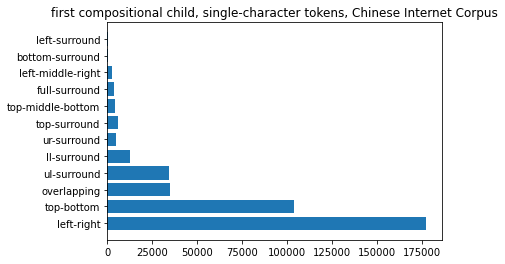

In [27]:
x = list(ct.keys())
y = [ct[i] for i in x]
x = [ids_to_english_desc[i] for i in x]
plt.title('first compositional child, single-character tokens, Chinese Internet Corpus')
plt.barh(x, y)